# Deep Reinforcement learning for the "Dollar Game" environment

In [1]:
# import the Graph which is the base for our environment
import networkx as nx
from graph import DGGraph, generate_game
from graph import load_game

# import the classes for ML
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Flatten
# from tensorflow.keras.optimizers import Adam

# utils
import numpy as np
from matplotlib import pyplot as plt

## Problem setup

### Environment
A graph (DGGraph object) representing a given game. The graph has nodes (with integer values assigned to them) and edges.\
The state is a dictionary {node: node[value] for each node in graph}. 

### Objective
Win the game by making debt (sum of all negative values) non-negative in as few moves as possible (avoid inverse actions; namely, both give and take actions on the same node)

### Action space
On each node, two actions can be taken: 'give' and 'take'.\
'Give' action increases value of the node's neighbors by 1 and subtracts len(neighbors) from its own value.
'Take' action does the complete opposite.\
Thus, $A = \left\{(\text{node},\;\text{give_or_take}): \text{node}\in\text{nodes}, \;\text{give_or_take}\in[\text{give}, \;\text{take}]\right\}$

### Reward function
IDK lol. Probably, something to do with debt (and/or the number of negative values)

## Graph visualization

In [4]:
def print_graph(G):
    for n in G.nodes:
        print(n, G.nodes[n])

In [5]:
def scale_down_positions(pos):
    x, y = pos
    return (x - 160)/640 - 0.5, 1 - y/600 - 0.5

def draw_graph(G, transform=False, savefig=''):
    pos = {node: scale_down_positions(node_data['pos']) if transform else node_data['pos'] \
        for node, node_data in G.nodes.items()}
    fig, ax = plt.subplots(figsize=(7, 7))
    for node, node_data in G.nodes.items():
        plt.text(pos[node][0] + 0.02, pos[node][1] + 0.02, str(node_data['val']), fontsize=14)
        # TODO: fix the shift of values' labels
    nx.draw_networkx(G, pos=pos, ax=ax, node_size=250)
    if savefig:
        fig.savefig(f'others/{savefig}')

In [5]:
G = load_game('16.json')

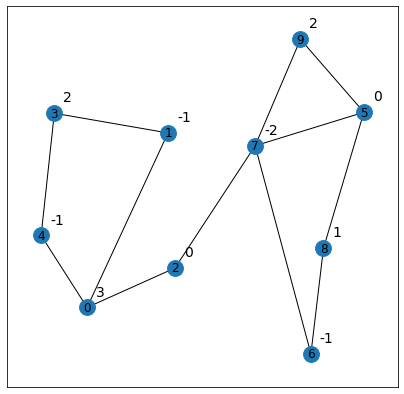

In [6]:
draw_graph(G, transform=True, savefig='')

# Random connected graph

In [18]:
G_rand = generate_game(number_of_nodes=10, bank_minus_genus=1)

In [19]:
print_graph(G_rand)

0 {'val': 4, 'pos': [345.0, 133.0]}
1 {'val': 0, 'pos': [311.0, 217.0]}
2 {'val': 4, 'pos': [210.0, 50.0]}
3 {'val': 2, 'pos': [379.0, 467.0]}
4 {'val': -4, 'pos': [446.0, 300.0]}
5 {'val': -1, 'pos': [581.0, 383.0]}
6 {'val': -3, 'pos': [750.0, 50.0]}
7 {'val': -1, 'pos': [548.0, 467.0]}
8 {'val': 4, 'pos': [548.0, 550.0]}
9 {'val': 1, 'pos': [682.0, 217.0]}


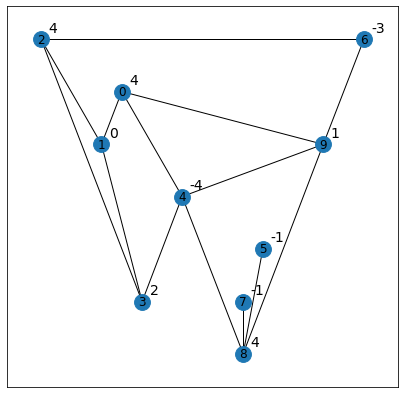

In [20]:
draw_graph(G_rand, transform=True)

In [21]:
from utils import save_new_game
save_new_game(G_rand)

New file 49.json created


'49.json'